In [97]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.metrics import roc_curve

In [98]:
heart= pd.read_csv("heart.csv")
print(heart.columns)
heart.shape

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


(918, 12)

In [99]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [100]:
moviles=pd.read_csv("moviles.csv")
print(moviles.columns)
moviles=moviles.drop(columns='blue', axis=1)
moviles=moviles.drop(columns='px_width', axis=1)
moviles=moviles.drop(columns='px_height', axis=1)
moviles=moviles.drop(columns='talk_time', axis=1)
moviles=moviles.drop(columns='wifi', axis=1)
print(moviles.columns)
moviles.shape

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
       'sc_w', 'three_g', 'touch_screen', 'price_range'],
      dtype='object')


(2000, 16)

In [101]:
moviles.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,three_g,touch_screen,price_range
0,842,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,0,0,1
1,1021,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,1,1,2
2,563,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,1,1,2
3,615,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,1,0,2
4,1821,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,1,1,1


In [102]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [103]:
moviles.dtypes

battery_power      int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
ram                int64
sc_h               int64
sc_w               int64
three_g            int64
touch_screen       int64
price_range        int64
dtype: object

In [104]:
#Utilizamos LabelEncoder para convertir variables no numéricas en valores numéricos. Por ejemplo, la columna ChestPainType con valores ATA, NAP, etc.. el LabelEncoder asignará a ATA el valor 1, a NAP el valor 2, etc...
from sklearn import preprocessing

# Crear una instancia de LabelEncoder
le = preprocessing.LabelEncoder()

for column in heart.columns:
    if heart[column].dtype == 'object':
        heart[column] = le.fit_transform(heart[column])

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [105]:
# Convertir valores NULL a 0
heart.fillna(0, inplace=True)

In [106]:
from sklearn import preprocessing

# Crear una instancia de LabelEncoder
le = preprocessing.LabelEncoder()

for column in moviles.columns:
    if moviles[column].dtype == 'object':
        moviles[column] = le.fit_transform(moviles[column])

moviles.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,three_g,touch_screen,price_range
0,842,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,0,0,1
1,1021,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,1,1,2
2,563,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,1,1,2
3,615,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,1,0,2
4,1821,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,1,1,1


In [107]:
moviles.fillna(0, inplace=True)

In [ ]:
# Gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='price_range', data=moviles, palette=['#1CA53B', '#AA1111', '#FFC300', '#FAC800'])

# Configuración del gráfico
plt.title('Distribución de la variable en el csv', fontsize=18)
plt.ylabel('Cantidad de la variable en el csv', fontsize=18)

# Añadir etiquetas con valores
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=11, color='dimgrey')

# Mostrar el gráfico
plt.show()

In [ ]:
# Gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='HeartDisease', data=heart, palette=['#1CA53B', '#AA1111'])

# Configuración del gráfico
plt.title('Distribución de la variable en el csv', fontsize=18)
plt.ylabel('Cantidad de la variable en el csv', fontsize=18)

# Añadir etiquetas con valores
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=11, color='dimgrey')

# Mostrar el gráfico
plt.show()

Algoritmo de clasificación: k-NN para heart.csv

In [110]:
from sklearn.neighbors import KNeighborsClassifier

x_heart = heart.drop('HeartDisease', axis=1)
y_heart = heart['HeartDisease']
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x_heart, y_heart, test_size=0.3, random_state=42)

In [111]:
# Algoritmo de clasificación: k-NN

In [112]:
from sklearn.preprocessing import StandardScaler
#Nos aseguramos de que todas las características tengan la misma escala
scaler = StandardScaler()
x_train_scaled_h = scaler.fit_transform(x_train_h)
x_test_scaled_h = scaler.transform(x_test_h)


In [113]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(x_train_scaled_h,y_train_h)

KNeighborsClassifier()

In [114]:
#A continuación, realizamos la validación cruzada en 5 particiones (cv=5)
validacion_cruzada_knn_h = cross_val_score(modelo_knn, x_train_scaled_h, y_train_h, cv=5, scoring='accuracy')
print("Precisión en cada pliegue:", validacion_cruzada_knn_h)

Precisión en cada pliegue: [0.88372093 0.8372093  0.84375    0.828125   0.8359375 ]


In [115]:
# Realizamos predicciones utilizando validación cruzada
predict_knn_h = cross_val_predict(modelo_knn, x_test_scaled_h, y_test_h, cv=5)

In [116]:
print("Modelo: k-NN con Validación Cruzada")
accuracy_knn_h = accuracy_score(y_test_h, predict_knn_h)
print(f"Accuracy: {accuracy_knn_h:.4f}")
precision_knn_h = precision_score(y_test_h, predict_knn_h)
print(f"Precision: {precision_knn_h:.4f}")
recall_knn_h = recall_score(y_test_h, predict_knn_h)
print(f"Recall: {recall_knn_h:.4f}")
f1_knn_h = f1_score(y_test_h, predict_knn_h)
print(f"F1 Score: {f1_knn_h:.4f}")
roc_auc_knn_h = roc_auc_score(y_test_h, predict_knn_h)
print(f"ROC AUC: {roc_auc_knn_h:.4f}")
matriz_conf_knn_h = confusion_matrix(y_test_h, predict_knn_h)

Modelo: k-NN con Validación Cruzada
Accuracy: 0.8841
Precision: 0.9342
Recall: 0.8659
F1 Score: 0.8987
ROC AUC: 0.8883


Matriz de confusion:


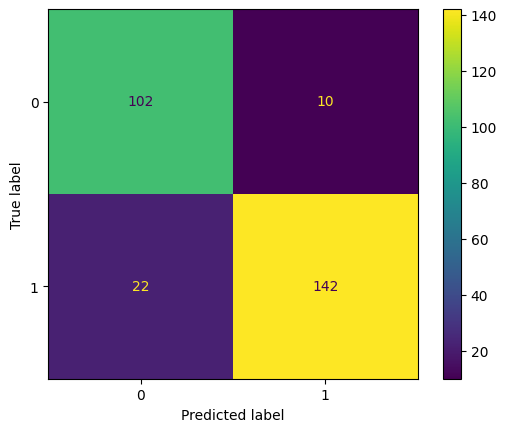

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_knn_h)
disp.plot()

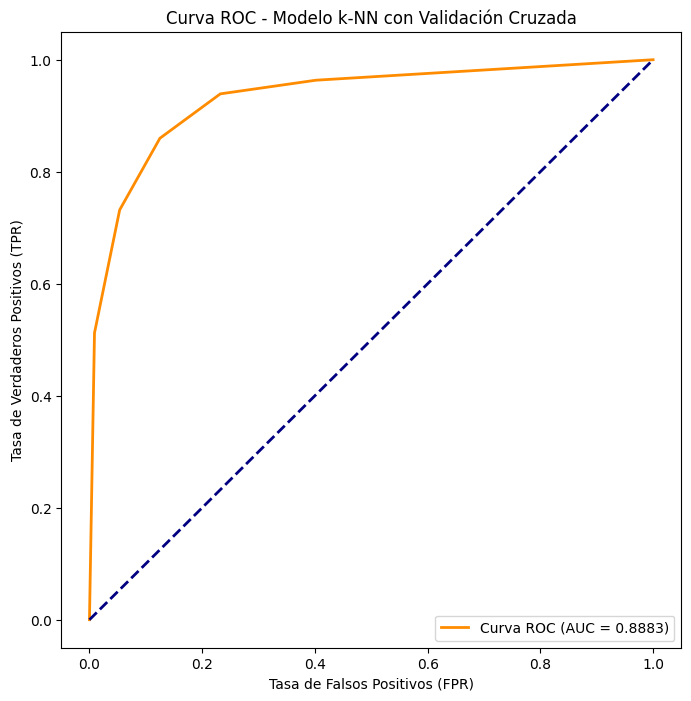

In [118]:
# CURVA ROC
# Obtener las probabilidades de predicción para la clase positiva
y_probs_knn_h = modelo_knn.predict_proba(x_test_scaled_h)[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr_knn_h, tpr_knn_h, _ = roc_curve(y_test_h, y_probs_knn_h)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_h, tpr_knn_h, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_knn_h:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo k-NN con Validación Cruzada')
plt.legend(loc="lower right")
print()
plt.show()

In [119]:
TP_knn_h = matriz_conf_knn_h[1, 1]
TN_knn_h = matriz_conf_knn_h[0, 0]
FP_knn_h = matriz_conf_knn_h[0, 1]
FN_knn_h = matriz_conf_knn_h[1, 0]

# True Positive Rate (TPR)
TPR_knn_h = TP_knn_h / (TP_knn_h + FN_knn_h)

#True Negative Rate (TNR)
TNR_knn_h = TN_knn_h / (TN_knn_h + FP_knn_h)

print("TPR: ", TPR_knn_h)
print("TNR: ", TNR_knn_h)

TPR:  0.8658536585365854
TNR:  0.9107142857142857


Algoritmo de clasificación: k-NN para moviles.csv

In [120]:
#Ahora hacemos k-NN para el moviles.csv

In [121]:
x_moviles = moviles.drop('price_range', axis=1) 
y_moviles = moviles['price_range']
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_moviles, y_moviles, test_size=0.3, random_state=42)

In [122]:
scaler = StandardScaler()
x_train_scaled_m = scaler.fit_transform(x_train_m)
x_test_scaled_m = scaler.transform(x_test_m)

In [123]:
modelo_knn_moviles = KNeighborsClassifier()
modelo_knn_moviles.fit(x_train_scaled_m,y_train_m)

KNeighborsClassifier()

In [124]:
param_grid = {
    'n_neighbors': [4,8,12,16,20,24,28,32,36,40],        
    'weights': ['uniform', 'distance']
}

In [125]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(estimator=modelo_knn_moviles, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled_m, y_train_m)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [126]:
mejor_knn = grid_search.best_estimator_

predict_grid = mejor_knn.predict(x_test_scaled_m)

accuracy = accuracy_score(y_test_m, predict_grid)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

Precisión en el conjunto de prueba: 0.6100


In [127]:
validacion_cruzada_knn_m = cross_val_score(modelo_knn_moviles, x_train_scaled_m, y_train_m, cv=5, scoring='accuracy')
print("Precisión en cada pliegue:", validacion_cruzada_knn_m)

Precisión en cada pliegue: [0.51785714 0.48928571 0.51428571 0.51785714 0.51785714]


In [128]:
# Realizamos predicciones utilizando validación cruzada
predict_knn_m = cross_val_predict(modelo_knn_moviles, x_test_scaled_m, y_test_m, cv=5)

In [129]:
print("Modelo: k-NN con Validación Cruzada")
accuracy_knn_m = accuracy_score(y_test_m, predict_grid)
print(f"Accuracy: {accuracy_knn_m:.4f}")
precision_knn_m = precision_score(y_test_m, predict_grid, average='macro')
print(f"Precision: {precision_knn_m:.4f}")
recall_knn_m = recall_score(y_test_m, predict_grid, average='macro')
print(f"Recall: {recall_knn_m:.4f}")
f1_knn_m = f1_score(y_test_m, predict_grid, average='macro')
print(f"F1 Score: {f1_knn_m:.4f}")
matriz_conf_knn_m = confusion_matrix(y_test_m, predict_grid)

Modelo: k-NN con Validación Cruzada
Accuracy: 0.6100
Precision: 0.6199
Recall: 0.6080
F1 Score: 0.6127


Matriz de confusion con GridSearch (arreglado):


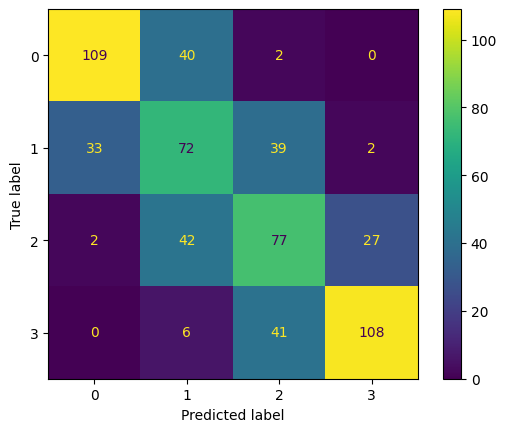

In [130]:
print("Matriz de confusion con GridSearch (arreglado):")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_knn_m)
disp.plot()

Modelo: k-NN con Validación Cruzada
Accuracy: 0.4567
Precision: 0.4730
Recall: 0.4556
F1 Score: 0.4575
Matriz de confusion sin GridSearch (sin arreglar):


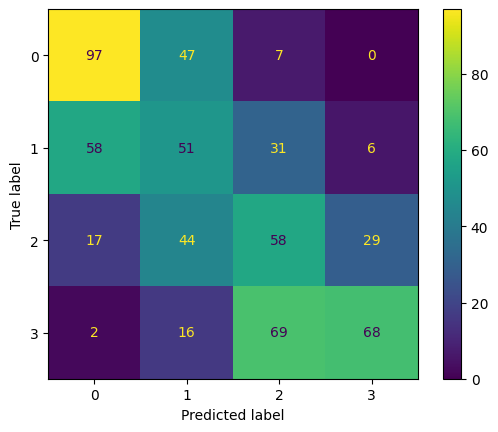

In [131]:
#Aquí hacemos la matriz de confusión para el algoritmo K-NN del moviles.csv sin GridSearch para ver la comparativa con la matriz anterior (con GridSearch)
matriz_conf_knn_m_sinarreglar = confusion_matrix(y_test_m, predict_knn_m)
print("Modelo: k-NN con Validación Cruzada")
accuracy_knn_m_sinarreglar = accuracy_score(y_test_m, predict_knn_m)
print(f"Accuracy: {accuracy_knn_m_sinarreglar:.4f}")
precision_knn_m_sinarreglar = precision_score(y_test_m, predict_knn_m, average='macro')
print(f"Precision: {precision_knn_m_sinarreglar:.4f}")
recall_knn_m_sinarreglar = recall_score(y_test_m, predict_knn_m, average='macro')
print(f"Recall: {recall_knn_m_sinarreglar:.4f}")
f1_knn_m_sinarreglar = f1_score(y_test_m, predict_knn_m, average='macro')
print(f"F1 Score: {f1_knn_m_sinarreglar:.4f}")
print("Matriz de confusion sin GridSearch (sin arreglar):")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_knn_m_sinarreglar)
disp.plot()

Algoritmo de clasificación: Árbol para heart.csv

In [132]:
# Algoritmo de clasificación: Árbol

In [133]:
from sklearn.tree import DecisionTreeClassifier

arbol_h = DecisionTreeClassifier(random_state=42, max_depth=3)
arbol_h.fit(x_train_h,y_train_h)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [134]:
validacion_cruzada_arbol_h = cross_val_score(arbol_h, x_train_h, y_train_h, cv=5, scoring='accuracy')

In [135]:
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_arbol_h)

Puntajes de Precisión en cada pliegue: [0.86046512 0.86821705 0.8359375  0.8125     0.8203125 ]


In [136]:
y_pred_arbol_h = arbol_h.predict(x_test_h)

[Text(0.5, 0.875, 'ST_Slope <= 1.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]'),
 Text(0.25, 0.625, 'ChestPainType <= 0.5\ngini = 0.308\nsamples = 368\nvalue = [70, 298]'),
 Text(0.125, 0.375, 'MaxHR <= 175.5\ngini = 0.181\nsamples = 259\nvalue = [26, 233]'),
 Text(0.0625, 0.125, 'gini = 0.175\nsamples = 258\nvalue = [25, 233]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.375, 'Sex <= 0.5\ngini = 0.481\nsamples = 109\nvalue = [44, 65]'),
 Text(0.3125, 0.125, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.4375, 0.125, 'gini = 0.434\nsamples = 88\nvalue = [28, 60]'),
 Text(0.75, 0.625, 'Oldpeak <= 1.25\ngini = 0.279\nsamples = 274\nvalue = [228, 46]'),
 Text(0.625, 0.375, 'ChestPainType <= 0.5\ngini = 0.198\nsamples = 243\nvalue = [216, 27]'),
 Text(0.5625, 0.125, 'gini = 0.397\nsamples = 77\nvalue = [56, 21]'),
 Text(0.6875, 0.125, 'gini = 0.07\nsamples = 166\nvalue = [160, 6]'),
 Text(0.875, 0.375, 'FastingBS <= 0.5\ngini = 0.475\nsam

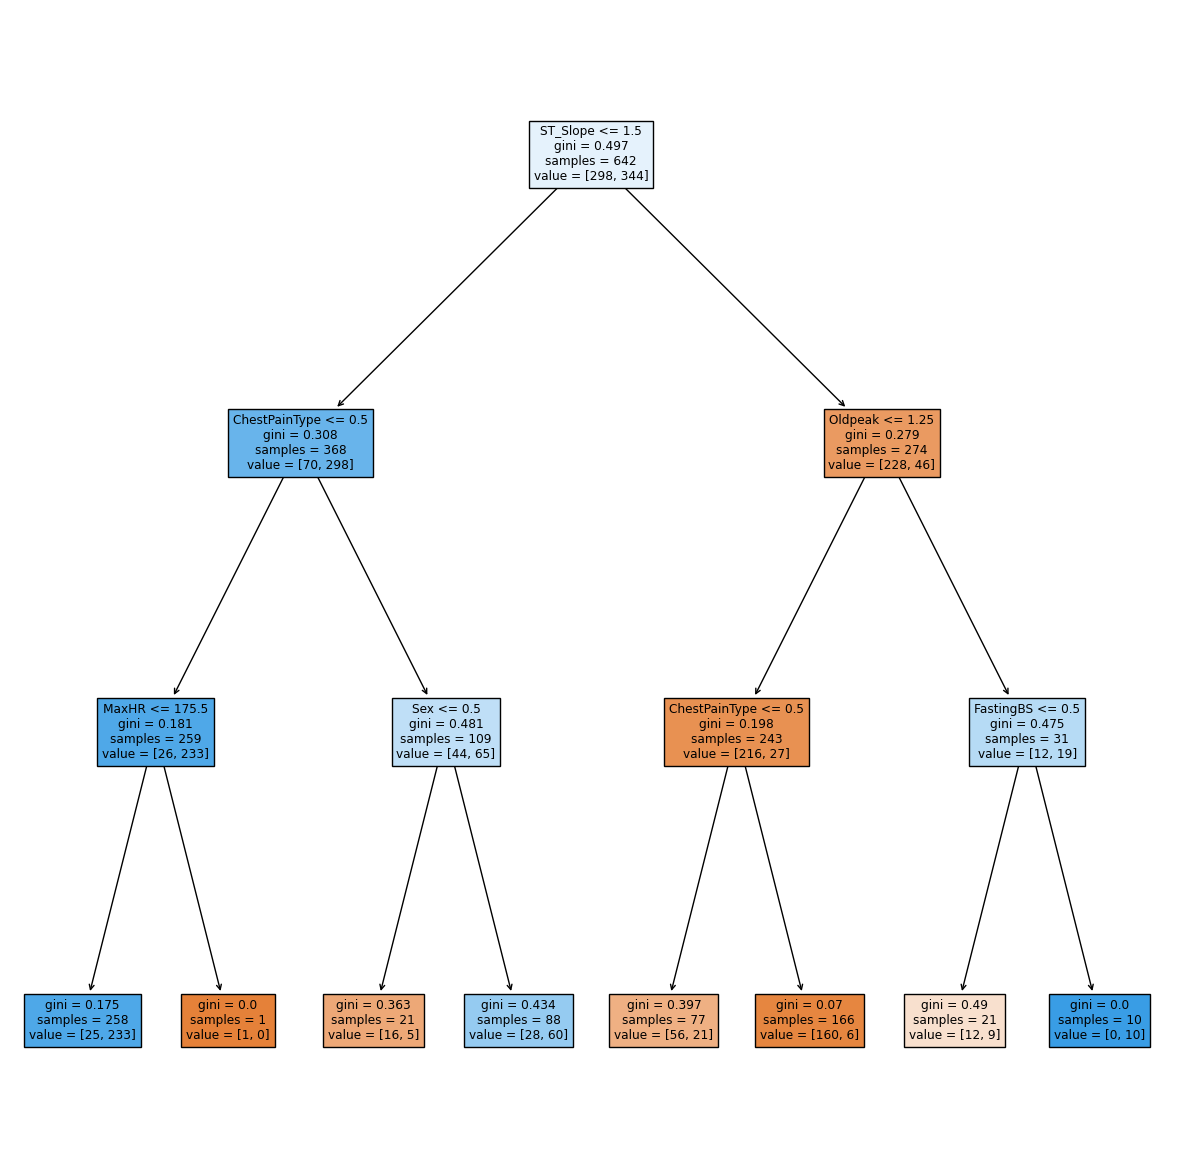

In [137]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(decision_tree=arbol_h, feature_names=x_train_h.columns, filled=True)

In [138]:
predict_arbol_h = cross_val_predict(arbol_h, x_test_h, y_test_h, cv=5)

In [139]:
print("Modelo: Árbol con Validación Cruzada")
accuracy_arbol_h = accuracy_score(y_test_h, predict_arbol_h)
print(f"Accuracy: {accuracy_arbol_h:.4f}")
precision_arbol_h = precision_score(y_test_h, predict_arbol_h)
print(f"Precision: {precision_arbol_h:.4f}")
recall_arbol_h = recall_score(y_test_h, predict_arbol_h)
print(f"Recall: {recall_arbol_h:.4f}")
f1_arbol_h = f1_score(y_test_h, predict_arbol_h)
print(f"F1 Score: {f1_arbol_h:.4f}")
roc_auc_arbol_h = roc_auc_score(y_test_h, predict_arbol_h)
print(f"ROC AUC: {roc_auc_arbol_h:.4f}")
matriz_conf_arbol_h = confusion_matrix(y_test_h, predict_arbol_h)

Modelo: Árbol con Validación Cruzada
Accuracy: 0.8659
Precision: 0.8848
Recall: 0.8902
F1 Score: 0.8875
ROC AUC: 0.8603


Matriz de confusion:


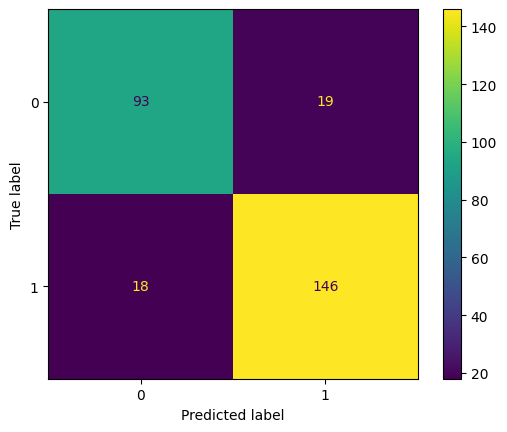

In [140]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_arbol_h)
disp.plot()

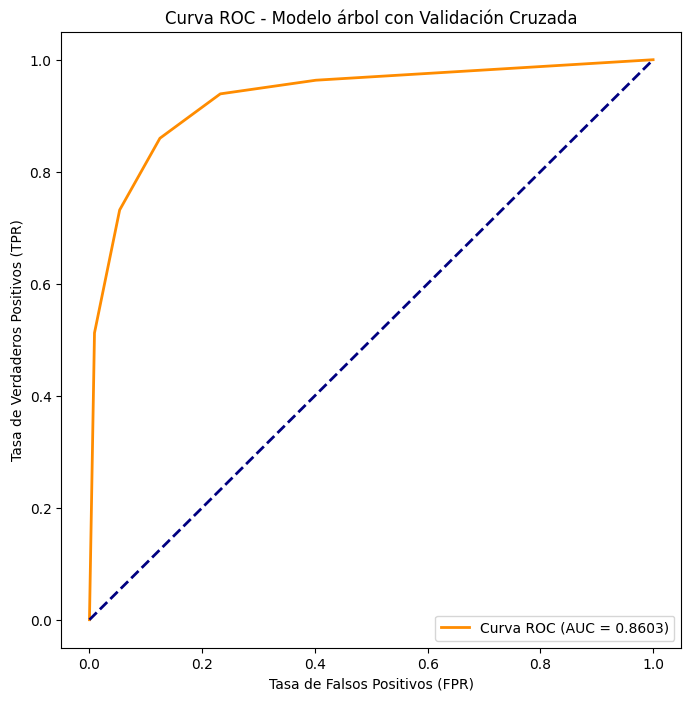

In [141]:
# CURVA ROC
# Obtener las probabilidades de predicción para la clase positiva
y_probs_knn_h = modelo_knn.predict_proba(x_test_scaled_h)[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr_knn_h, tpr_knn_h, _ = roc_curve(y_test_h, y_probs_knn_h)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_h, tpr_knn_h, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_arbol_h:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo árbol con Validación Cruzada')
plt.legend(loc="lower right")
print()
plt.show()

In [142]:
TP_arbol_h = matriz_conf_arbol_h[1, 1]
TN_arbol_h = matriz_conf_arbol_h[0, 0]
FP_arbol_h = matriz_conf_arbol_h[0, 1]
FN_arbol_h = matriz_conf_arbol_h[1, 0]

# True Positive Rate (TPR)
TPR_arbol_h = TP_arbol_h / (TP_arbol_h + FN_arbol_h)

#True Negative Rate (TNR)
TNR_arbol_h = TN_arbol_h / (TN_arbol_h + FP_arbol_h)

print("TPR: ", TPR_arbol_h)
print("TNR: ", TNR_arbol_h)

TPR:  0.8902439024390244
TNR:  0.8303571428571429


Algoritmo de clasificación: Árbol para moviles.csv

In [143]:
arbol_m = DecisionTreeClassifier(random_state=42, max_depth=3)
arbol_m.fit(x_train_m,y_train_m)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [144]:
validacion_cruzada_arbol_m = cross_val_score(arbol_m, x_train_m, y_train_m, cv=5, scoring='accuracy')

In [145]:
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_arbol_m)

Puntajes de Precisión en cada pliegue: [0.79285714 0.76071429 0.74285714 0.72857143 0.75714286]


In [146]:
y_pred_arbol_m = arbol_m.predict(x_test_m)

[Text(0.5, 0.875, 'ram <= 2217.5\ngini = 0.75\nsamples = 1400\nvalue = [349, 354, 352, 345]'),
 Text(0.25, 0.625, 'ram <= 1212.0\ngini = 0.584\nsamples = 730\nvalue = [349, 307, 74, 0]'),
 Text(0.125, 0.375, 'ram <= 1022.0\ngini = 0.251\nsamples = 347\nvalue = [296, 51, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.155\nsamples = 283\nvalue = [259, 24, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.488\nsamples = 64\nvalue = [37, 27, 0, 0]'),
 Text(0.375, 0.375, 'battery_power <= 1463.0\ngini = 0.497\nsamples = 383\nvalue = [53, 256, 74, 0]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 247\nvalue = [53, 180, 14, 0]'),
 Text(0.4375, 0.125, 'gini = 0.493\nsamples = 136\nvalue = [0, 76, 60, 0]'),
 Text(0.75, 0.625, 'ram <= 3013.5\ngini = 0.558\nsamples = 670\nvalue = [0, 47, 278, 345]'),
 Text(0.625, 0.375, 'battery_power <= 573.5\ngini = 0.45\nsamples = 307\nvalue = [0, 47, 219, 41]'),
 Text(0.5625, 0.125, 'gini = 0.469\nsamples = 24\nvalue = [0, 15, 9, 0]'),
 Text(0.6875, 0.125, 'gini = 0.416\nsam

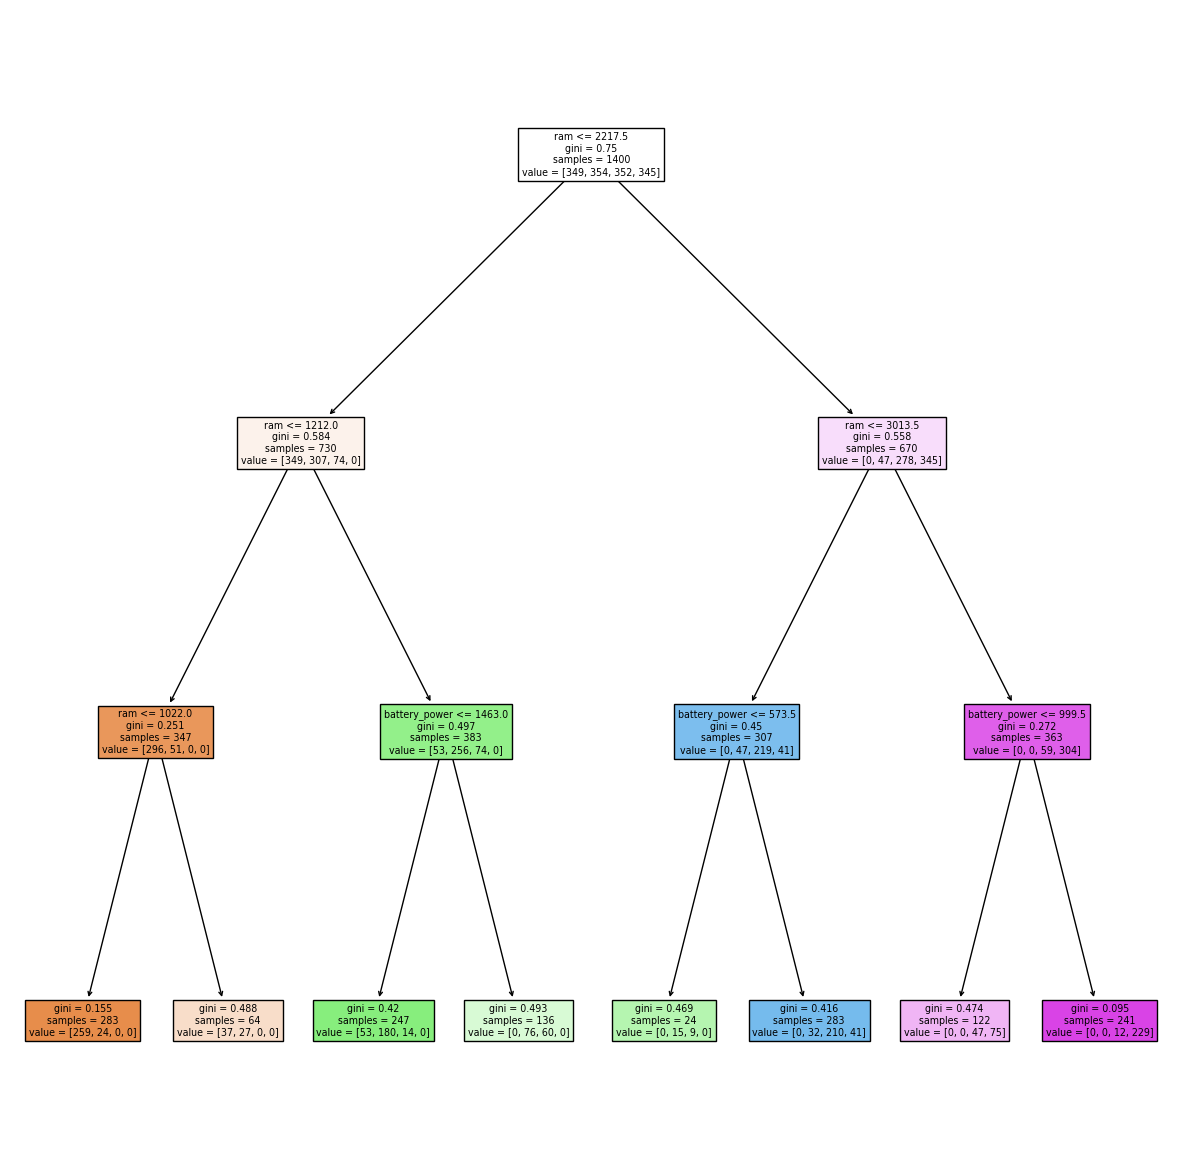

In [147]:
plt.figure(figsize=(15, 15))
plot_tree(decision_tree=arbol_m, feature_names=x_train_m.columns, filled=True)

In [148]:
predict_arbol_m = cross_val_predict(arbol_m, x_test_m, y_test_m, cv=5)

In [149]:
print("Modelo: Árbol con Validación Cruzada")
accuracy_arbol_m = accuracy_score(y_test_m, predict_arbol_m)
print(f"Accuracy: {accuracy_arbol_m:.4f}")
precision_arbol_m = precision_score(y_test_m, predict_arbol_m, average='macro')
print(f"Precision: {precision_arbol_m:.4f}")
recall_arbol_m = recall_score(y_test_m, predict_arbol_m, average='macro')
print(f"Recall: {recall_arbol_m:.4f}")
f1_arbol_m = f1_score(y_test_m, predict_arbol_m, average='macro')
print(f"F1 Score: {f1_arbol_m:.4f}")
matriz_conf_arbol_m = confusion_matrix(y_test_m, predict_arbol_m)

Modelo: Árbol con Validación Cruzada
Accuracy: 0.7350
Precision: 0.7475
Recall: 0.7349
F1 Score: 0.7362


Matriz de confusion:


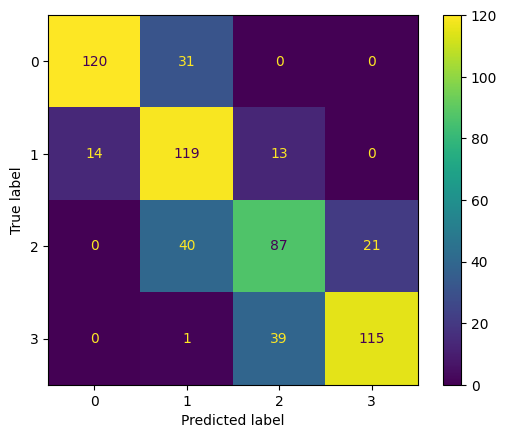

In [150]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_arbol_m)
disp.plot()

Algoritmo de clasificación: Naive-Bayes para heart.csv

In [151]:
# Algoritmo de clasificación: Naive-Bayes

In [152]:
from sklearn.naive_bayes import GaussianNB

bayes_h=GaussianNB()
bayes_h.fit(x_train_h, y_train_h)

GaussianNB()

In [153]:
validacion_cruzada_bayes_h = cross_val_score(bayes_h, x_train_h, y_train_h, cv=5, scoring='accuracy')
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_bayes_h)

Puntajes de Precisión en cada pliegue: [0.87596899 0.84496124 0.8046875  0.859375   0.859375  ]


In [154]:
y_pred_bayes_h = bayes_h.predict(x_test_h)

In [155]:
predict_bayes_h = cross_val_predict(bayes_h, x_test_h, y_test_h, cv=5)

In [156]:
print("Modelo: Naive-Bayes con Validación Cruzada")
accuracy_bayes_h = accuracy_score(y_test_h, predict_bayes_h)
print(f"Accuracy: {accuracy_bayes_h:.4f}")
precision_bayes_h = precision_score(y_test_h, predict_bayes_h)
print(f"Precision: {precision_bayes_h:.4f}")
recall_bayes_h = recall_score(y_test_h, predict_bayes_h)
print(f"Recall: {recall_bayes_h:.4f}")
f1_bayes_h = f1_score(y_test_h, predict_bayes_h)
print(f"F1 Score: {f1_bayes_h:.4f}")
roc_auc_bayes_h = roc_auc_score(y_test_h, predict_bayes_h)
print(f"ROC AUC: {roc_auc_bayes_h:.4f}")
matriz_conf_bayes_h = confusion_matrix(y_test_h, predict_bayes_h)

Modelo: Naive-Bayes con Validación Cruzada
Accuracy: 0.8478
Precision: 0.8861
Recall: 0.8537
F1 Score: 0.8696
ROC AUC: 0.8465


Matriz de confusion:


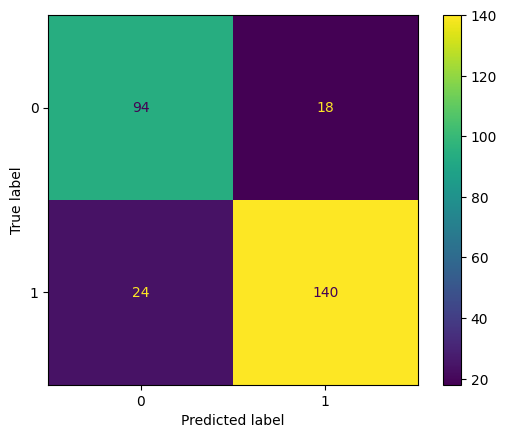

In [157]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_bayes_h)
disp.plot()

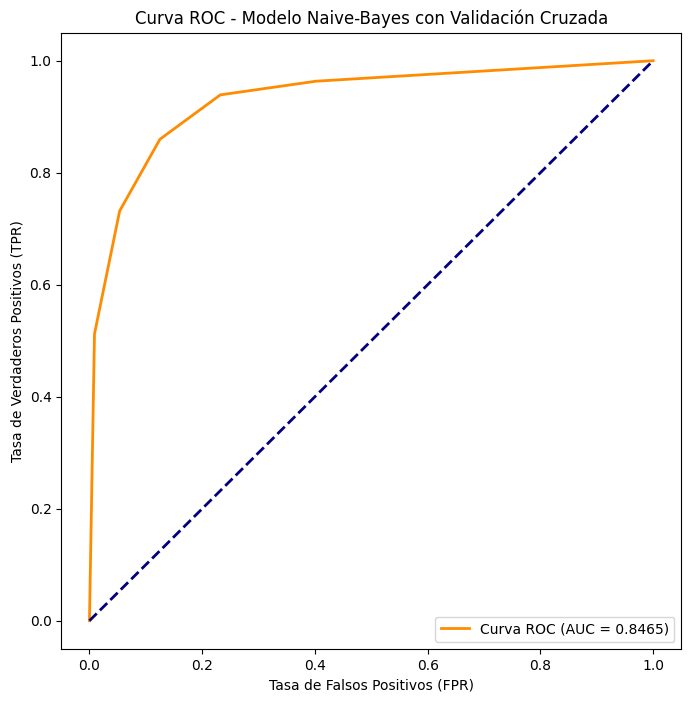

In [158]:
# CURVA ROC
# Obtener las probabilidades de predicción para la clase positiva
y_probs_knn_h = modelo_knn.predict_proba(x_test_scaled_h)[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr_knn_h, tpr_knn_h, _ = roc_curve(y_test_h, y_probs_knn_h)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_h, tpr_knn_h, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_bayes_h:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo Naive-Bayes con Validación Cruzada')
plt.legend(loc="lower right")
print()
plt.show()

In [159]:
TP_bayes_h = matriz_conf_bayes_h[1, 1]
TN_bayes_h = matriz_conf_bayes_h[0, 0]
FP_bayes_h = matriz_conf_bayes_h[0, 1]
FN_bayes_h = matriz_conf_bayes_h[1, 0]

# True Positive Rate (TPR)
TPR_bayes_h = TP_bayes_h / (TP_bayes_h + FN_bayes_h)

#True Negative Rate (TNR)
TNR_bayes_h = TN_bayes_h / (TN_bayes_h + FP_bayes_h)

print("TPR: ", TPR_bayes_h)
print("TNR: ", TNR_bayes_h)

TPR:  0.8536585365853658
TNR:  0.8392857142857143


Algoritmo de clasificación: Naive-Bayes para moviles.csv

In [160]:
bayes_m=GaussianNB()
bayes_m.fit(x_train_m, y_train_m)

GaussianNB()

In [161]:
validacion_cruzada_bayes_m = cross_val_score(bayes_m, x_train_m, y_train_m, cv=5, scoring='accuracy')
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_bayes_m)

Puntajes de Precisión en cada pliegue: [0.81071429 0.79285714 0.75357143 0.73571429 0.76428571]


In [162]:
y_pred_bayes_m = bayes_m.predict(x_test_m)

In [163]:
predict_bayes_m = cross_val_predict(bayes_m, x_test_m, y_test_m, cv=5)

In [164]:
print("Modelo: Naive-Bayes con Validación Cruzada")
accuracy_bayes_m = accuracy_score(y_test_m, predict_bayes_m)
print(f"Accuracy: {accuracy_bayes_m:.4f}")
precision_bayes_m = precision_score(y_test_m, predict_bayes_m, average='macro')
print(f"Precision: {precision_bayes_m:.4f}")
recall_bayes_m = recall_score(y_test_m, predict_bayes_m, average='macro')
print(f"Recall: {recall_bayes_m:.4f}")
f1_bayes_m = f1_score(y_test_m, predict_bayes_m, average='macro')
print(f"F1 Score: {f1_bayes_m:.4f}")
matriz_conf_bayes_m = confusion_matrix(y_test_m, predict_bayes_m)

Modelo: Naive-Bayes con Validación Cruzada
Accuracy: 0.7700
Precision: 0.7683
Recall: 0.7684
F1 Score: 0.7683


Matriz de confusion:


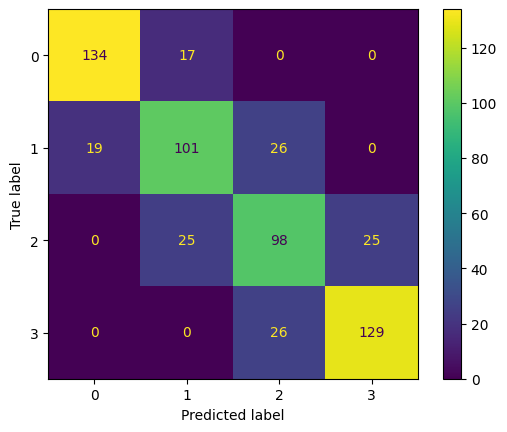

In [165]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_bayes_m)
disp.plot()

Algoritmo de clasificación: Linear SVC para heart.csv

In [166]:
# Algoritmo de clasificación: Linear SVC

In [167]:
from sklearn.svm import LinearSVC

svc_h = LinearSVC(random_state=10,max_iter=600,dual=False)
svc_h.fit(x_train_scaled_h, y_train_h)

LinearSVC(dual=False, max_iter=600, random_state=10)

In [168]:
validacion_cruzada_svc_h = cross_val_score(svc_h, x_train_scaled_h, y_train_h, cv=5, scoring='accuracy')
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_svc_h)

Puntajes de Precisión en cada pliegue: [0.84496124 0.8372093  0.8359375  0.828125   0.84375   ]


In [169]:
y_pred_svc_h = svc_h.predict(x_test_scaled_h)
predict_svc_h = cross_val_predict(svc_h, x_test_scaled_h, y_test_h, cv=5)

In [170]:
print("Modelo: Linear SVC con Validación Cruzada")
accuracy_svc_h = accuracy_score(y_test_h, predict_svc_h)
print(f"Accuracy: {accuracy_svc_h:.4f}")
precision_svc_h = precision_score(y_test_h, predict_svc_h)
print(f"Precision: {precision_svc_h:.4f}")
recall_svc_h = recall_score(y_test_h, predict_svc_h)
print(f"Recall: {recall_svc_h:.4f}")
f1_svc_h = f1_score(y_test_h, predict_svc_h)
print(f"F1 Score: {f1_svc_h:.4f}")
roc_auc_svc_h = roc_auc_score(y_test_h, predict_svc_h)
print(f"ROC AUC: {roc_auc_svc_h:.4f}")
matriz_conf_svc_h = confusion_matrix(y_test_h, predict_svc_h)

Modelo: Linear SVC con Validación Cruzada
Accuracy: 0.8478
Precision: 0.8812
Recall: 0.8598
F1 Score: 0.8704
ROC AUC: 0.8451


Matriz de confusion:


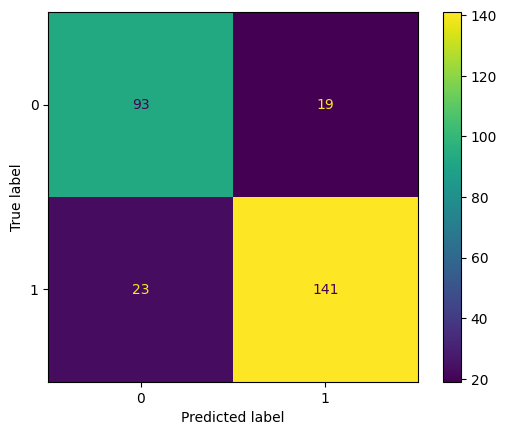

In [171]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_svc_h)
disp.plot()

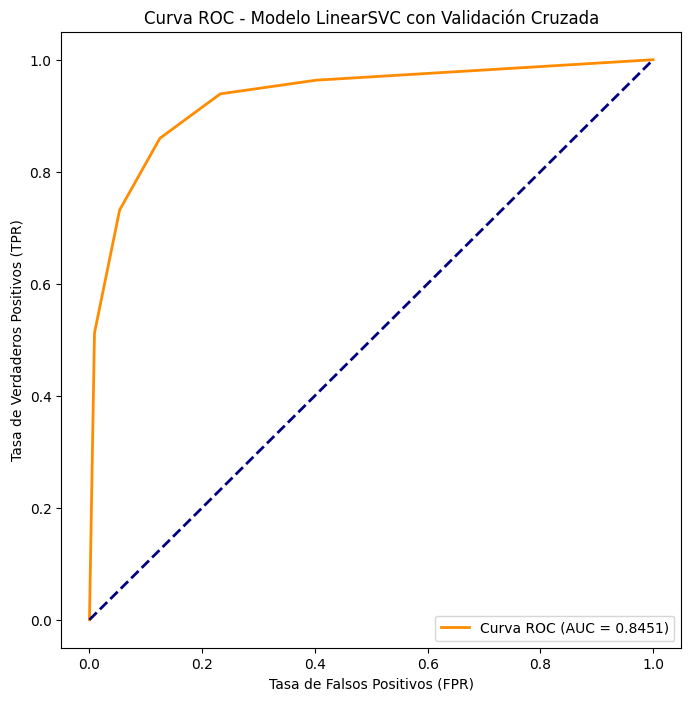

In [172]:
# CURVA ROC
# Obtener las probabilidades de predicción para la clase positiva
y_probs_knn_h = modelo_knn.predict_proba(x_test_scaled_h)[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr_knn_h, tpr_knn_h, _ = roc_curve(y_test_h, y_probs_knn_h)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_h, tpr_knn_h, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_svc_h:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo LinearSVC con Validación Cruzada')
plt.legend(loc="lower right")
print()
plt.show()

In [173]:
TP_svc_h = matriz_conf_svc_h[1, 1]
TN_svc_h = matriz_conf_svc_h[0, 0]
FP_svc_h = matriz_conf_svc_h[0, 1]
FN_svc_h = matriz_conf_svc_h[1, 0]

# True Positive Rate (TPR)
TPR_svc_h = TP_svc_h / (TP_svc_h + FN_svc_h)

#True Negative Rate (TNR)
TNR_svc_h = TN_svc_h / (TN_svc_h + FP_svc_h)

print("TPR: ", TPR_svc_h)
print("TNR: ", TNR_svc_h)

TPR:  0.8597560975609756
TNR:  0.8303571428571429


Modelo: Linear SVC sin escalar con Validación Cruzada
Accuracy: 0.8406
Precision: 0.8797
Recall: 0.8476
F1 Score: 0.8634
ROC AUC: 0.8390
Matriz de confusion:


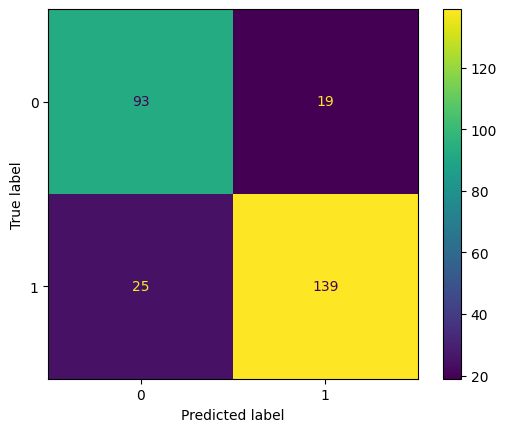

In [174]:
# Aquí hacemos el LinearSVC sin escalar para ver si mejora o empeora con respecto al que está escalado
svc_h_sin=LinearSVC(random_state=10,max_iter=600,dual=False)
svc_h_sin.fit(x_train_h,y_train_h)
predict_svc_h_sin = cross_val_predict(svc_h_sin, x_test_h, y_test_h, cv=5)

print("Modelo: Linear SVC sin escalar con Validación Cruzada")
accuracy_svc_h_sin = accuracy_score(y_test_h, predict_svc_h_sin)
print(f"Accuracy: {accuracy_svc_h_sin:.4f}")
precision_svc_h_sin = precision_score(y_test_h, predict_svc_h_sin)
print(f"Precision: {precision_svc_h_sin:.4f}")
recall_svc_h_sin = recall_score(y_test_h, predict_svc_h_sin)
print(f"Recall: {recall_svc_h_sin:.4f}")
f1_svc_h_sin = f1_score(y_test_h, predict_svc_h_sin)
print(f"F1 Score: {f1_svc_h_sin:.4f}")
roc_auc_svc_h_sin = roc_auc_score(y_test_h, predict_svc_h_sin)
print(f"ROC AUC: {roc_auc_svc_h_sin:.4f}")
matriz_conf_svc_h_sin = confusion_matrix(y_test_h, predict_svc_h_sin)

print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_svc_h_sin)
disp.plot()

Algoritmo de clasificación: Linear SVC para moviles.csv

In [175]:
svc_m = LinearSVC(random_state=10,max_iter=600, dual=False)
svc_m.fit(x_train_scaled_m, y_train_m)

LinearSVC(dual=False, max_iter=600, random_state=10)

In [176]:
validacion_cruzada_svc_m = cross_val_score(svc_m, x_train_scaled_m, y_train_m, cv=5, scoring='accuracy')
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_svc_m)

Puntajes de Precisión en cada pliegue: [0.8        0.74285714 0.79285714 0.775      0.73928571]


In [177]:
y_pred_svc_m = svc_m.predict(x_test_scaled_m)
predict_svc_m = cross_val_predict(svc_m, x_test_scaled_m, y_test_m, cv=5)

In [178]:
print("Modelo: Linear SVC con Validación Cruzada")
accuracy_svc_m = accuracy_score(y_test_m, predict_svc_m)
print(f"Accuracy: {accuracy_svc_m:.4f}")
precision_svc_m = precision_score(y_test_m, predict_svc_m, average='macro')
print(f"Precision: {precision_svc_m:.4f}")
recall_svc_m = recall_score(y_test_m, predict_svc_m, average='macro')
print(f"Recall: {recall_svc_m:.4f}")
f1_svc_m = f1_score(y_test_m, predict_svc_m, average='macro')
print(f"F1 Score: {f1_svc_m:.4f}")
matriz_conf_svc_m = confusion_matrix(y_test_m, predict_svc_m)

Modelo: Linear SVC con Validación Cruzada
Accuracy: 0.7283
Precision: 0.7139
Recall: 0.7245
F1 Score: 0.7141


Matriz de confusion:


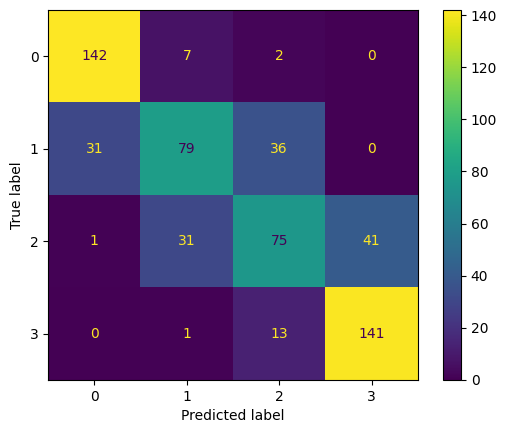

In [179]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_svc_m)
disp.plot()

Algoritmo de clasificación: Redes Neuronales para heart.csv

In [180]:
# Algoritmo de clasificación: Redes Neuronales

In [181]:
from sklearn.neural_network import MLPClassifier
redes_h=MLPClassifier(max_iter=500, hidden_layer_sizes=(100, 50))
redes_h.fit(x_train_scaled_h, y_train_h)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [182]:
validacion_cruzada_redes_h = cross_val_score(redes_h, x_train_scaled_h, y_train_h, cv=5, scoring='accuracy')
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_redes_h)

Puntajes de Precisión en cada pliegue: [0.78294574 0.8372093  0.8203125  0.8203125  0.8046875 ]


In [183]:
y_pred_redes_h = redes_h.predict(x_test_scaled_h)
predict_redes_h = cross_val_predict(redes_h, x_test_scaled_h, y_test_h, cv=5)

In [184]:
print("Modelo: Redes Neuronales con Validación Cruzada")
accuracy_redes_h = accuracy_score(y_test_h, predict_redes_h )
print(f"Accuracy: {accuracy_redes_h:.4f}")
precision_redes_h = precision_score(y_test_h, predict_redes_h )
print(f"Precision: {precision_redes_h:.4f}")
recall_redes_h = recall_score(y_test_h, predict_redes_h )
print(f"Recall: {recall_redes_h:.4f}")
f1_redes_h = f1_score(y_test_h, predict_redes_h )
print(f"F1 Score: {f1_redes_h:.4f}")
roc_auc_redes_h = roc_auc_score(y_test_h, predict_redes_h )
print(f"ROC AUC: {roc_auc_redes_h:.4f}")
matriz_conf_redes_h = confusion_matrix(y_test_h, predict_redes_h )

Modelo: Redes Neuronales con Validación Cruzada
Accuracy: 0.8696
Precision: 0.8902
Recall: 0.8902
F1 Score: 0.8902
ROC AUC: 0.8648


Matriz de confusion:


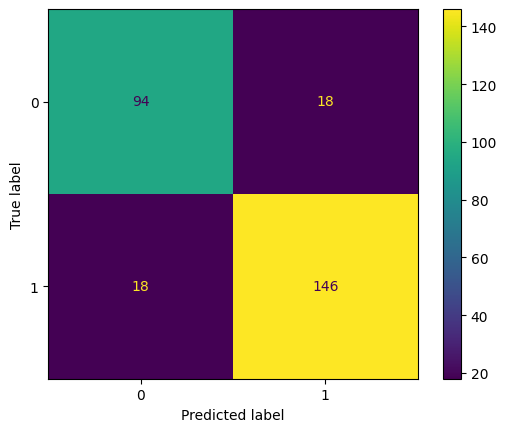

In [185]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_redes_h)
disp.plot()

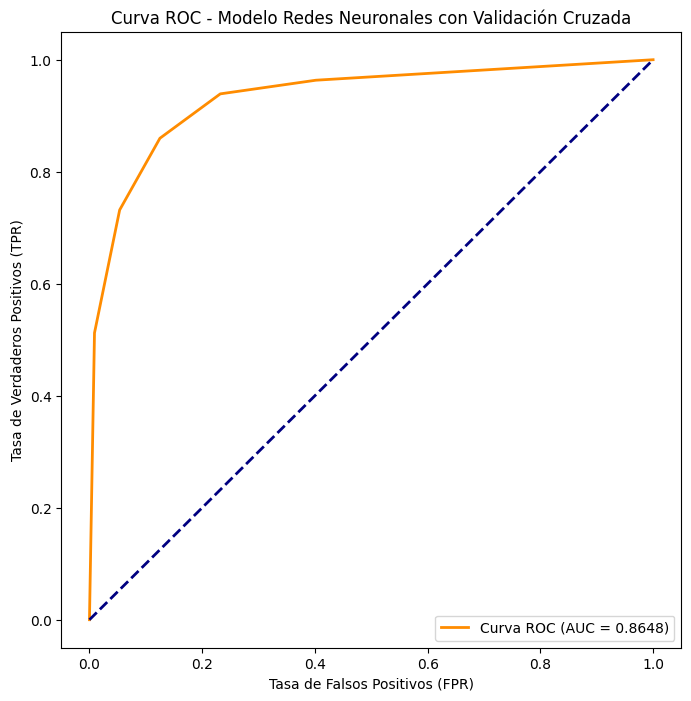

In [186]:
# CURVA ROC
# Obtener las probabilidades de predicción para la clase positiva
y_probs_knn_h = modelo_knn.predict_proba(x_test_scaled_h)[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr_knn_h, tpr_knn_h, _ = roc_curve(y_test_h, y_probs_knn_h)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_h, tpr_knn_h, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_redes_h:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo Redes Neuronales con Validación Cruzada')
plt.legend(loc="lower right")
print()
plt.show()

In [187]:
TP_redes_h = matriz_conf_redes_h[1, 1]
TN_redes_h = matriz_conf_redes_h[0, 0]
FP_redes_h = matriz_conf_redes_h[0, 1]
FN_redes_h = matriz_conf_redes_h[1, 0]

# True Positive Rate (TPR)
TPR_redes_h = TP_redes_h / (TP_redes_h + FN_redes_h)

#True Negative Rate (TNR)
TNR_redes_h = TN_redes_h / (TN_redes_h + FP_redes_h)

print("TPR: ", TPR_redes_h)
print("TNR: ", TNR_redes_h)

TPR:  0.8902439024390244
TNR:  0.8392857142857143


Algoritmo de clasificación: Redes Neuronales para moviles.csv

In [188]:
redes_m=MLPClassifier(max_iter=500, hidden_layer_sizes=(100, 50))
redes_m.fit(x_train_scaled_m, y_train_m)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [189]:
validacion_cruzada_redes_m = cross_val_score(redes_m, x_train_scaled_m, y_train_m, cv=5, scoring='accuracy')
print("Puntajes de Precisión en cada pliegue:", validacion_cruzada_redes_m)

Puntajes de Precisión en cada pliegue: [0.76785714 0.76785714 0.81071429 0.77857143 0.76071429]


In [190]:
y_pred_redes_m = redes_m.predict(x_test_scaled_m)
predict_redes_m = cross_val_predict(redes_m, x_test_scaled_m, y_test_m, cv=5)

In [191]:
print("Modelo: Redes Neuronales con Validación Cruzada")
accuracy_redes_m = accuracy_score(y_test_m, predict_redes_m)
print(f"Accuracy: {accuracy_redes_m:.4f}")
precision_redes_m = precision_score(y_test_m, predict_redes_m, average='macro')
print(f"Precision: {precision_redes_m:.4f}")
recall_redes_m = recall_score(y_test_m, predict_redes_m, average='macro')
print(f"Recall: {recall_redes_m:.4f}")
f1_redes_m = f1_score(y_test_m, predict_redes_m, average='macro')
print(f"F1 Score: {f1_redes_m:.4f}")
matriz_conf_redes_m = confusion_matrix(y_test_m, predict_redes_m)

Modelo: Redes Neuronales con Validación Cruzada
Accuracy: 0.7283
Precision: 0.7239
Recall: 0.7262
F1 Score: 0.7245


Matriz de confusion:


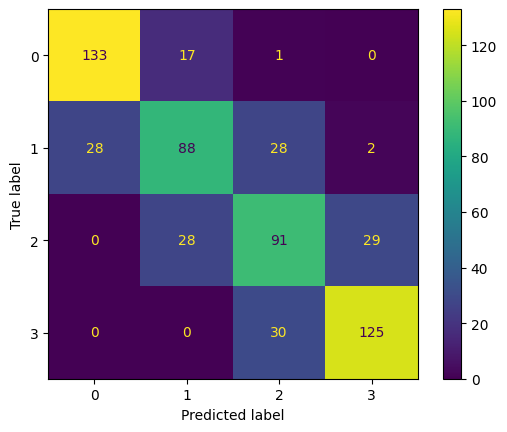

In [192]:
print("Matriz de confusion:")
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_redes_m)
disp.plot()